# <center> <font color=blue size="8"> Programming Assignment 2 </font> </center>
# <center> <font color=blue size="8"> COE 292 - Term 223 </font> </center>



In [127]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras.layers.core import Activation
#from keras.utils.generic_utils import get_custom_objects

from keras.utils import get_custom_objects

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


In [128]:
# Define the custom activation function
def TH(x):
    return tf.where(x >= 0, [1], [0])


In [129]:

# Add the custom activation function to the Keras custom objects
get_custom_objects().update({'TH': Activation(TH)})

# Define the shape boundary points
boundary_points = np.array([(2, 2), (2, 6), (4, 6), (6, 8), (6, 2), (2, 2)])


In [130]:
from matplotlib.path import Path

boundary_path = Path(boundary_points)

def is_inside_shape(point):
    return boundary_path.contains_point(point)

In [131]:
# Generate training and testing sets
def generate_data(num_samples):
    x = np.random.uniform(0, 10, (num_samples, 2))
    y = np.array([is_inside_shape(point) for point in x])
    return x, y

train_samples = 20000
test_samples = 1000

x_train, y_train = generate_data(train_samples)
x_test, y_test = generate_data(test_samples)


In [132]:
# Define the MLP model
model = Sequential([
    Dense(5, activation='TH', input_shape=(2,)),
    Dense(2, activation='TH'),
    Dense(1, activation='sigmoid')
])
model.summary()


Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_207 (Dense)           (None, 5)                 15        
                                                                 
 dense_208 (Dense)           (None, 2)                 12        
                                                                 
 dense_209 (Dense)           (None, 1)                 3         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [133]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50


500/500 [==============================] - 2s 2ms/step - loss: 0.5178 - accuracy: 0.8183 - val_loss: 0.4696 - val_accuracy: 0.8322
Epoch 2/50
500/500 [==============================] - 1s 2ms/step - loss: 0.4780 - accuracy: 0.8183 - val_loss: 0.4549 - val_accuracy: 0.8322
Epoch 3/50
500/500 [==============================] - 1s 2ms/step - loss: 0.4742 - accuracy: 0.8183 - val_loss: 0.4534 - val_accuracy: 0.8322
Epoch 4/50
500/500 [==============================] - 1s 2ms/step - loss: 0.4740 - accuracy: 0.8183 - val_loss: 0.4530 - val_accuracy: 0.8322
Epoch 5/50
500/500 [==============================] - 1s 2ms/step - loss: 0.4740 - accuracy: 0.8183 - val_loss: 0.4529 - val_accuracy: 0.8322
Epoch 6/50
500/500 [==============================] - 1s 3ms/step - loss: 0.4740 - accuracy: 0.8183 - val_loss: 0.4528 - val_accuracy: 0.8322
Epoch 7/50
500/500 [==============================] - 1s 3ms/step - loss: 0.4740 - accuracy: 0.8183 - val_loss: 0.4528 - val_accuracy: 0.8322
Epoch 8/50
500/50

In [134]:
# Evaluate the model on training and testing sets
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))

Training Accuracy: 82.11%
Testing Accuracy: 82.10%


In [135]:
# Get weights and biases for the first dense layer
weights_layer1, biases_layer1 = model.layers[0].get_weights()

# Get weights and biases for the second dense layer
weights_layer2, biases_layer2 = model.layers[1].get_weights()

# Get weights and biases for the third dense layer
weights_layer3, biases_layer3 = model.layers[2].get_weights()

# Print the weights and biases for each layer
print("Layer 1 - Weights:\n", weights_layer1)
print("Layer 1 - Biases:\n", biases_layer1)

print("Layer 2 - Weights:\n", weights_layer2)
print("Layer 2 - Biases:\n", biases_layer2)

print("Layer 3 - Weights:\n", weights_layer3)
print("Layer 3 - Biases:\n", biases_layer3)

Layer 1 - Weights:
 [[-0.2534486  -0.1867041   0.72664964  0.45906866  0.25294757]
 [-0.37512004  0.37927926 -0.47430715 -0.23205984  0.40514314]]
Layer 1 - Biases:
 [0. 0. 0. 0. 0.]
Layer 2 - Weights:
 [[-0.919529   -0.04662603]
 [ 0.56603193 -0.20886636]
 [ 0.92535615 -0.91322464]
 [-0.26590455  0.05234855]
 [ 0.48625958 -0.64433247]]
Layer 2 - Biases:
 [0. 0.]
Layer 3 - Weights:
 [[-0.9707006 ]
 [ 0.44324493]]
Layer 3 - Biases:
 [-0.5381876]


In [136]:
# Predict labels for a grid of points to visualize the decision boundary
x_grid, y_grid = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 8, 80))
grid_points = np.vstack((x_grid.ravel(), y_grid.ravel())).T
grid_predictions = model.predict(grid_points)
grid_predictions = (grid_predictions > 0.5).astype(int)


250/250 [==============================] - 0s 1ms/step


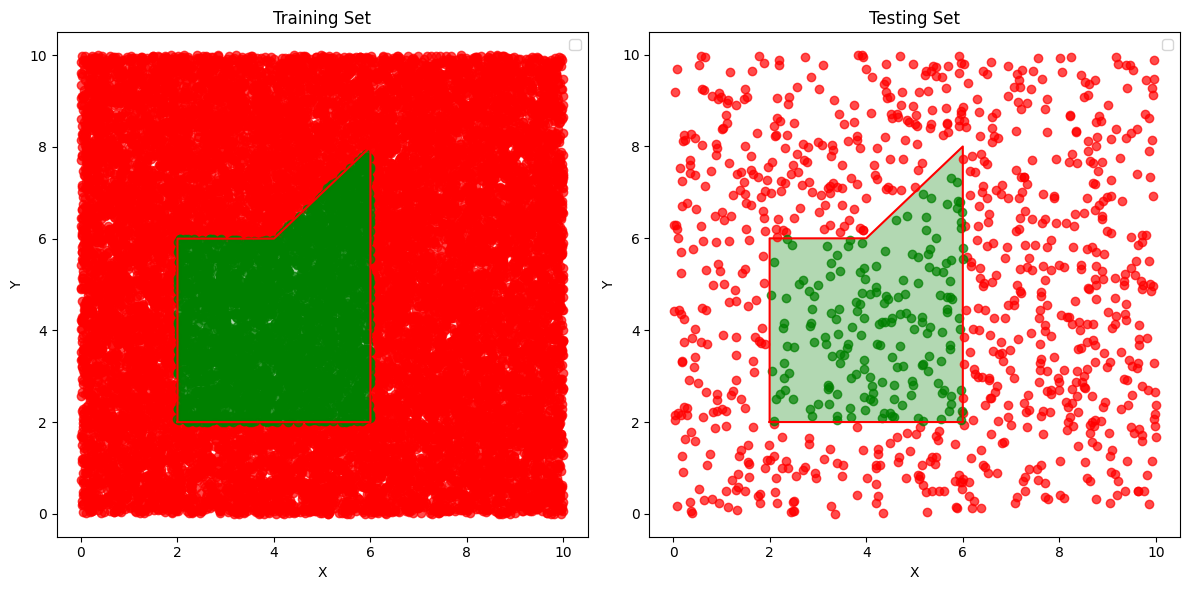

In [137]:

# Plot the decision boundary and training/testing data
plt.figure(figsize=(12, 6))

# Plot training set points
plt.subplot(1, 2, 1)
plt.plot(boundary_points[:, 0], boundary_points[:, 1], 'r-')
plt.fill(boundary_points[:, 0], boundary_points[:, 1], 'g', alpha=0.3)
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], color='red', marker='o', alpha=0.7)
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], color='green', marker='o', alpha=0.7)
plt.title('Training Set')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Plot testing set points
plt.subplot(1, 2, 2)
plt.plot(boundary_points[:, 0], boundary_points[:, 1], 'r-')
plt.fill(boundary_points[:, 0], boundary_points[:, 1], 'g', alpha=0.3)
plt.scatter(x_test[y_test == 0, 0], x_test[y_test == 0, 1], color='red', marker='o', alpha=0.7)
plt.scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], color='green', marker='o', alpha=0.7)
plt.title('Testing Set')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()


In [138]:
# Create the neural network model to be trained
model2 = Sequential()

# Create the MLP model
model2 = Sequential([
    Dense(5, activation='relu', input_shape=(2,)),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2.summary()

Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_210 (Dense)           (None, 5)                 15        
                                                                 
 dense_211 (Dense)           (None, 2)                 12        
                                                                 
 dense_212 (Dense)           (None, 1)                 3         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [139]:
# train your 2nd model
# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.3, verbose=1)

Epoch 1/50
438/438 [==============================] - 2s 3ms/step - loss: 0.4611 - accuracy: 0.8172 - val_loss: 0.4356 - val_accuracy: 0.8302
Epoch 2/50
438/438 [==============================] - 1s 3ms/step - loss: 0.4511 - accuracy: 0.8172 - val_loss: 0.4223 - val_accuracy: 0.8302
Epoch 3/50
438/438 [==============================] - 1s 3ms/step - loss: 0.4355 - accuracy: 0.8172 - val_loss: 0.4040 - val_accuracy: 0.8302
Epoch 4/50
438/438 [==============================] - 1s 2ms/step - loss: 0.4139 - accuracy: 0.8172 - val_loss: 0.3800 - val_accuracy: 0.8302
Epoch 5/50
438/438 [==============================] - 1s 2ms/step - loss: 0.3855 - accuracy: 0.8172 - val_loss: 0.3485 - val_accuracy: 0.8302
Epoch 6/50
438/438 [==============================] - 1s 2ms/step - loss: 0.3494 - accuracy: 0.8192 - val_loss: 0.3082 - val_accuracy: 0.8365
Epoch 7/50
438/438 [==============================] - 1s 2ms/step - loss: 0.2993 - accuracy: 0.8414 - val_loss: 0.2629 - val_accuracy: 0.8672
Epoch 

In [140]:
# Evaluate how well your 2nd model performs

train_loss, train_accuracy = model2.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = model2.evaluate(x_test, y_test, verbose=0)

print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))


Training Accuracy: 97.46%
Testing Accuracy: 97.50%


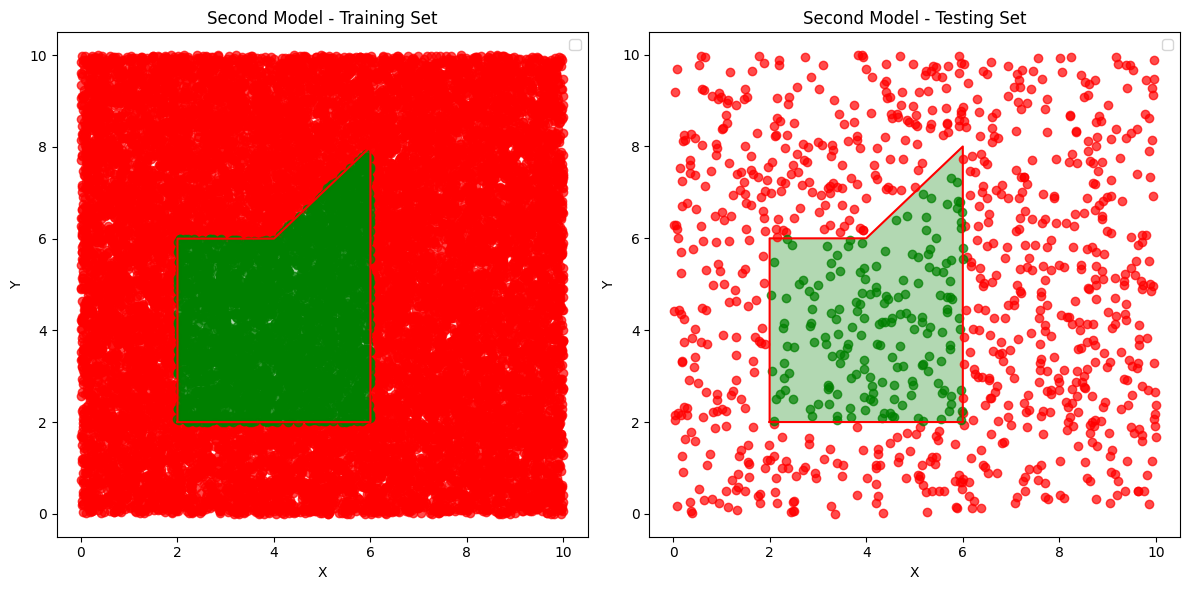

In [141]:
# Plot the decision boundary and training/testing data for the second model
plt.figure(figsize=(12, 6))

# Plot training set points for the second model
plt.subplot(1, 2, 1)
plt.plot(boundary_points[:, 0], boundary_points[:, 1], 'r-')
plt.fill(boundary_points[:, 0], boundary_points[:, 1], 'g', alpha=0.3)
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], color='red', marker='o', alpha=0.7)
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], color='green', marker='o', alpha=0.7)
plt.title('Second Model - Training Set')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Plot testing set points for the second model
plt.subplot(1, 2, 2)
plt.plot(boundary_points[:, 0], boundary_points[:, 1], 'r-')
plt.fill(boundary_points[:, 0], boundary_points[:, 1], 'g', alpha=0.3)
plt.scatter(x_test[y_test == 0, 0], x_test[y_test == 0, 1], color='red', marker='o', alpha=0.7)
plt.scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], color='green', marker='o', alpha=0.7)
plt.title('Second Model - Testing Set')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()